<a href="https://colab.research.google.com/github/haaaram/MS-AIschool/blob/main/DeepPiCar(Project)/ImageAugmentation%2BnewXML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp /content/drive/MyDrive/images_turn.zip /content

In [ ]:
!mkdir /content/images
!unzip -q images_turn.zip -d /content/images/all/
!mkdir /content/images/dr/

In [ ]:
import xml.etree.ElementTree as ET
import os
from PIL import Image

# 원본 이미지와 XML 파일이 있는 폴더 경로
input_folder = '/content/images/all/'

output_folder = '/content/images/dr/'

# 이미지 데이터 증강 및 XML 파일 생성을 위한 변수 초기화
SIZE = 224
dataset = []
my_images = os.listdir(input_folder)

for i, file_name in enumerate(my_images):
  # 이미지 데이터 증강 및 XML 파일 생성 함수
  if file_name.split('.')[1] == 'jpg' and 'turn_sign' in file_name:
    image = Image.open(input_folder + file_name)
    image = image.resize((SIZE, SIZE))

    # 이미지 데이터 증강 작업 (좌우 반전)
    image = image.transpose(Image.FLIP_LEFT_RIGHT)

    image = image.convert("RGB")

    # 증강된 이미지 저장
    new_file_path = os.path.join(output_folder, file_name)
    image.save(new_file_path)

for i, file_name in enumerate(my_images):
  if file_name.split('.')[1] == 'xml' and 'turn_sign' in file_name:
    # XML 파일인 경우
    # 원본 XML 파일 로드
    xml_file_path = os.path.join(input_folder, file_name)
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    # 이미지 데이터 증강 작업 및 객체 위치 정보 수정
    for object in root.findall('object'):
      bbox = object.find('bndbox')
      xmin = float(bbox.find('xmin').text)
      xmax = float(bbox.find('xmax').text)

      new_xmin = SIZE - xmax
      new_xmax = SIZE - xmin

      bbox.find('xmin').text = str(new_xmin)
      bbox.find('xmax').text = str(new_xmax)

          # 수정된 XML 파일 생성
    new_xml_file_path = os.path.join(output_folder, 'dr_' + file_name)
    new_tree = ET.ElementTree(root)  # 루트 엘리먼트를 복제하여 새 XML 파일 생성
    new_tree.write(new_xml_file_path)

print("모든 파일을 처리하고 수정된 XML 파일 및 이미지를 생성했습니다.")


모든 파일을 처리하고 수정된 XML 파일 및 이미지를 생성했습니다.


In [ ]:
# 이미지 데이터 증강 설정
datagen = ImageDataGenerator(
    horizontal_flip=True
)

    # # 이미지 파일인 경우
    # image = io.imread(input_folder + file_name)
    # image = Image.fromarray(image, 'RGB')
    # image = image.resize((SIZE, SIZE))
    # # dataset.append(np.array(image))
    # # x = np.array(dataset)

    # # 이미지 데이터 증강 작업 (좌우 반전)
    # image = np.fliplr(image)

    # # 증강된 이미지 저장
    # new_file_path = os.path.join(output_folder, file_name)
    # image.save(new_file_path)


# for batch in datagen.flow(x, batch_size=1,
#                           save_to_dir= '/content/images/dr/',
#                           save_prefix='dr',
#                           save_format='jpg'):
#     i += 1
#     if i > 117:
#       break

In [ ]:
tree = ET.parse('/content/images/all/20230812_025943_jpg.rf.20b036c24f3558db6ed477d5238dd38d.xml')
root = tree.getroot()

    # 이미지 데이터 증강 작업 및 객체 위치 정보 수정
for object in root.findall('object'):
  bbox = object.find('bndbox')
  xmin = float(bbox.find('xmin').text)
  xmax = float(bbox.find('xmax').text)

  new_xmin = SIZE - xmax
  new_xmax = SIZE - xmin

  bbox.find('xmin').text = str(new_xmin)
  bbox.find('xmax').text = str(new_xmax)

          # 수정된 XML 파일 생성
new_xml_file_path = os.path.join(output_folder, 'dr_' + file_name)
new_tree = ET.ElementTree(root)  # 루트 엘리먼트를 복제하여 새 XML 파일 생성
new_tree.write(new_xml_file_path)

In [ ]:
import albumentations as A
import cv2

# Declare an augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread("/content/images/20230812_025943_jpg.rf.20b036c24f3558db6ed477d5238dd38d.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

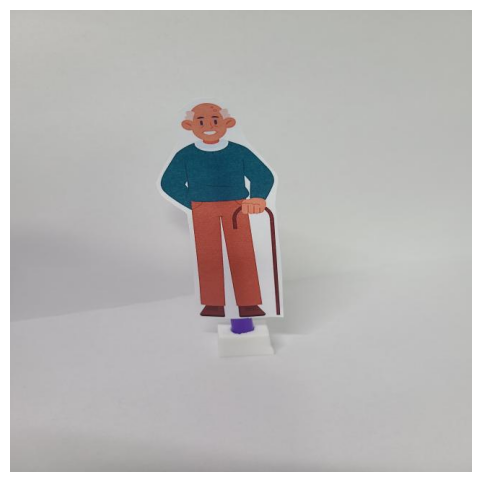

In [ ]:
import matplotlib.pyplot as plt

def visualize(image):
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(image)

visualize(transformed_image)